<a href="https://colab.research.google.com/github/Hayeon101/deep-learning-basic/blob/main/03/03_03_nn_Module%EA%B3%BC_%ED%81%B4%EB%9E%98%EC%8A%A4%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pytorch에서 이미 구현되어 있는 함수들을 제공받아 쉽게 선형 회귀 모델을 구현해봅시다.

선형 회귀 모델은 nn.Linear()라는 함수, 평균 제곱 오차는 nn.functional.mse_loss()로 구현되어 있습니다.

In [ ]:
# 예제 : 실행하지 말 것

import torch.nn as nn
model = nn.Linear(input_dim, output_dim)

import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)

## 1. 단순 선형 회귀 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

$y = 2x$를 가정된 상태로 만들어진 데이터를 선언합니다.

In [2]:
# 데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.

In [3]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim = 1, output_dim = 1
model = nn.Linear(1,1)

선언한 model에는 가중치 $W$와 편향 $b$가 저장되어져 있는데, model.parameters() 함수를 통해 불러올 수 있습니다.

In [4]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


첫 번째 값이 $W$이고, 두 번째 값이 $b$입니다. 두 변수 모두 학습의 대상이므로 requires_grad = True로 지정되어 있습니다.

옵티마이저를 정의합니다.

In [5]:
# optimizer 설정. 경사 하강법 SGD를 사용하고 learning rate를 의미하는 lr은 0.01로 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train) # <= Pytorch에서 제공하는 평균 제곱 오차 함수

  # cost로 H(x)를 개선
  # gradient를 0으로 초기화
  optimizer.zero_grad()
  # 비용 함수를 미분하여 gradient 계산
  cost.backward() # backward 연산
  # W와 b를 업데이트
  optimizer.step()

  if epoch % 100 == 0:
    # 100번마다 로그 출력
    print(f'Epoch {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}')

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000


In [7]:
# 임의의 입력 4를 선언
new_var = torch.FloatTensor([[4.0]])
# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산
# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :",pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


훈련이 잘 된 것 같으니 학습 후의 $W$와 $b$값을 봅시다.

In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


* **forward 연산과 backward 연산**
  - $H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 합니다.
    - 학습 전, prediction = model(x_train)은 x_train으로부터 예측값을 리턴하므로 forward 연산입니다.
    - 학습 후, pred_y = model(new_var)은 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산입니다.
  - 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산이라고 합니다.
    - cost.backward()는 비용함수로부터 기울기를 구하는 코드이며 backward 연산입니다.

## 2. 다중 선형 회귀 구현하기

nn.Linear()와 nn.functional.mse_loss()로 다중 선형 회귀를 구현해 봅니다. 코드에서 큰 차이는 없습니다.

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

3개의 $x$로부터 하나의 $y$를 예측합니다.

따라서 가설 수식은 $H(x) = w_1x_1 + w_2x_2 + w_3x_3 + b$ 가 됩니다.

In [17]:
# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [21]:
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim = 3, output_dim = 1.
model = nn.Linear(3,1)

In [19]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.5435,  0.3462, -0.1188]], requires_grad=True), Parameter containing:
tensor([0.2937], requires_grad=True)]


옵티마이저를 정의합니다. model_parameters()를 사용하여 3개의 $w$와 $b$를 전달합니다. 학습률은 0.00001 (1e-5) 로 정합니다.

*유의 사항 : 학습률을 0.01로 정의하지 않는 이유*

학습률을 0.01로 정의하게 된다면 기울기가 발산하게 됩니다. 모델의 필요한 크기보다 학습률이 커지게 되는 것입니다. (아래의 그림 참조)

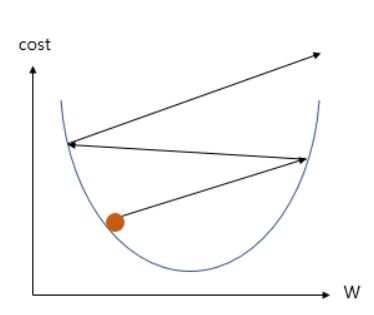

In [22]:
# optimizer 정의
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train)

  # cost로 H(x)를 개선
  # gradient를 0으로 초기화
  optimizer.zero_grad()
  # 비용 함수를 미분하여 gradient 계산
  cost.backward()
  # W와 b를 업데이트
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch: {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}")

Epoch:    0/2000 Cost: 24821.373047
Epoch:  100/2000 Cost: 0.849148
Epoch:  200/2000 Cost: 0.825597
Epoch:  300/2000 Cost: 0.803225
Epoch:  400/2000 Cost: 0.781968
Epoch:  500/2000 Cost: 0.761775
Epoch:  600/2000 Cost: 0.742599
Epoch:  700/2000 Cost: 0.724357
Epoch:  800/2000 Cost: 0.707025
Epoch:  900/2000 Cost: 0.690548
Epoch: 1000/2000 Cost: 0.674883
Epoch: 1100/2000 Cost: 0.659985
Epoch: 1200/2000 Cost: 0.645810
Epoch: 1300/2000 Cost: 0.632342
Epoch: 1400/2000 Cost: 0.619514
Epoch: 1500/2000 Cost: 0.607307
Epoch: 1600/2000 Cost: 0.595680
Epoch: 1700/2000 Cost: 0.584620
Epoch: 1800/2000 Cost: 0.574083
Epoch: 1900/2000 Cost: 0.564048
Epoch: 2000/2000 Cost: 0.554477


Cost의 값이 작은 것을 보니 훈련이 잘 되었습니다.

임의의 입력 [73,80,75]를 넣어서 $y$값을 확인해 봅시다.

In [23]:
new_var = torch.FloatTensor([[73,80,75]])
pred_y = model(new_var)
print('훈련 후 입력이 73,80,75일 때의 예측값 :',pred_y)

훈련 후 입력이 73,80,75일 때의 예측값 : tensor([[151.6526]], grad_fn=<AddmmBackward0>)


학습 후의 3개의 $w$와 $b$의 값을 출력해봅시다.

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.7497, 0.4868, 0.7725]], requires_grad=True), Parameter containing:
tensor([0.0386], requires_grad=True)]


## 3. 모델을 클래스로 구현하기

단순 선형 회귀 모델을 클래스로 구현하면 다음과 같습니다.

In [ ]:
# 앞선 예제 : 실행하지 말 것
model = nn.Linear(3,1)

In [26]:
class LinearRegressionModel(nn.Module): # torch.nn.Module을 상속받는 파이썬 클래스
  def __init__(self):
    super().__init__() # nn.Module 클래스의 속성들을 상속받습니다.
    self.linear = nn.Linear(1,1) # 단순 선형 회귀이므로 input_dim = 1, output_dim = 1

  def forward(self, x):
    return self.linear(x)

In [27]:
model = LinearRegressionModel()

위와 같은 모델 구현 방식은 대부분의 Pytorch 구현체에서 사용하고 있는 방식입니다.

클래스 (class) 형태의 모델은 부모 클래스 nn.Module을 상속받습니다. 생성자 \_\_init__()에서는 모델의 구조와 동작을 정의합니다. forward() 메소드는 학습데이터를 인자로 받아 forward 연산을 진행하여 반환합니다.

아래와 같은 방식으로 모델 객체를 선언하고, 메소드를 호출할 수 있습니다.

```python
model = LinearRegressionModel()
model.forward(x) # x는 입력 데이터
```

## 4. 단순 선형 회귀 클래스로 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [2]:
# 데이터
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [4]:
# 모델을 클래스로 구현
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    return self.linear(x)

model = LinearRegressionModel()

In [5]:
# optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(1,nb_epochs+1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train)

  # cost로 H(x)를 개선
  # gradient를 0으로 초기화
  optimizer.zero_grad()
  # 비용 함수를 미분하여 gradient 계산
  cost.backward()
  # W와 b를 업데이트
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch: {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}")

Epoch:  100/2000 Cost: 0.001733
Epoch:  200/2000 Cost: 0.001071
Epoch:  300/2000 Cost: 0.000662
Epoch:  400/2000 Cost: 0.000409
Epoch:  500/2000 Cost: 0.000253
Epoch:  600/2000 Cost: 0.000156
Epoch:  700/2000 Cost: 0.000096
Epoch:  800/2000 Cost: 0.000060
Epoch:  900/2000 Cost: 0.000037
Epoch: 1000/2000 Cost: 0.000023
Epoch: 1100/2000 Cost: 0.000014
Epoch: 1200/2000 Cost: 0.000009
Epoch: 1300/2000 Cost: 0.000005
Epoch: 1400/2000 Cost: 0.000003
Epoch: 1500/2000 Cost: 0.000002
Epoch: 1600/2000 Cost: 0.000001
Epoch: 1700/2000 Cost: 0.000001
Epoch: 1800/2000 Cost: 0.000000
Epoch: 1900/2000 Cost: 0.000000
Epoch: 2000/2000 Cost: 0.000000


## 5. 다중 선형 회귀 클래스로 구현하기

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [9]:
# 데이터
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

In [11]:
# 클래스로 모델을 구현
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1) # 다중 선형 회귀이므로 input_dim = 3, output_dim = 1.

  def forward(self,x):
    return self.linear(x)

model = MultivariateLinearRegressionModel()

In [12]:
# optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [13]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(1,nb_epochs+1):

  # H(x) 계산
  prediction = model(x_train)

  # cost 계산
  cost = F.mse_loss(prediction, y_train)

  # cost로 H(x)를 개선
  # gradient를 0으로 초기화
  optimizer.zero_grad()
  # 비용 함수를 미분하여 gradient 계산
  cost.backward()
  # W와 b를 업데이트
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch: {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}")

Epoch:  100/2000 Cost: 0.226011
Epoch:  200/2000 Cost: 0.223930
Epoch:  300/2000 Cost: 0.221953
Epoch:  400/2000 Cost: 0.220074
Epoch:  500/2000 Cost: 0.218288
Epoch:  600/2000 Cost: 0.216593
Epoch:  700/2000 Cost: 0.214968
Epoch:  800/2000 Cost: 0.213431
Epoch:  900/2000 Cost: 0.211972
Epoch: 1000/2000 Cost: 0.210574
Epoch: 1100/2000 Cost: 0.209243
Epoch: 1200/2000 Cost: 0.207984
Epoch: 1300/2000 Cost: 0.206778
Epoch: 1400/2000 Cost: 0.205630
Epoch: 1500/2000 Cost: 0.204536
Epoch: 1600/2000 Cost: 0.203488
Epoch: 1700/2000 Cost: 0.202492
Epoch: 1800/2000 Cost: 0.201549
Epoch: 1900/2000 Cost: 0.200644
Epoch: 2000/2000 Cost: 0.199780


In [14]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]
